<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### Load the csv file

In [2]:
df_emp = pd.read_csv('emp_attrition.csv')
df_emp.head(15)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8
5,35,No,Travel_Rarely,Human Resources,8,Technical Degree,3,Male,3,1,Human Resources,3,4323,1,No,17,3,5
6,34,No,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,2,Healthcare Representative,4,7756,0,No,17,3,6
7,30,No,Travel_Frequently,Research & Development,2,Technical Degree,4,Female,2,1,Research Scientist,1,4968,0,No,16,3,9
8,37,No,Travel_Rarely,Sales,6,Medical,3,Male,3,2,Sales Executive,4,6502,4,No,14,3,5
9,26,Yes,Travel_Frequently,Human Resources,17,Life Sciences,2,Female,3,1,Human Resources,3,2741,0,Yes,11,3,7


In [3]:
df_emp.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

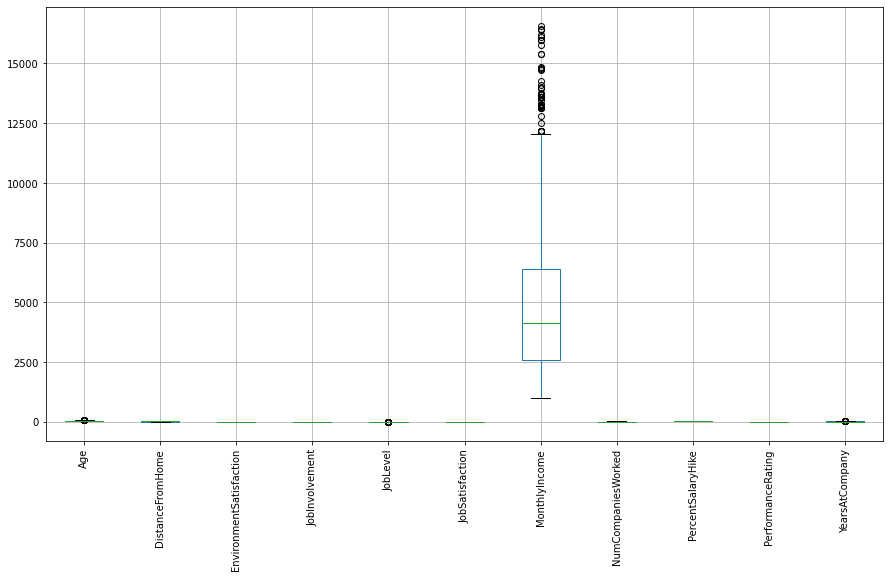

In [4]:
plt.figure(figsize=(15,8))

df_emp.boxplot()
plt.xticks(rotation = 'vertical')
plt.show()

In [5]:
num_cols = df_emp.select_dtypes(include= np.number).columns
num_cols

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [6]:
q1 = df_emp.quantile(0.25)
q3 = df_emp.quantile(0.75)
iqr = q3 - q1
iqr

Age                          11.00
DistanceFromHome             14.00
EnvironmentSatisfaction       2.00
JobInvolvement                1.00
JobLevel                      1.00
JobSatisfaction               2.00
MonthlyIncome              3825.25
NumCompaniesWorked            3.00
PercentSalaryHike             4.00
PerformanceRating             0.00
YearsAtCompany                6.00
dtype: float64

In [7]:
df_emp = df_emp[~((df_emp < (q1 - 1.5 * iqr)) | (df_emp > (q3 + 1.5 * iqr))).any(axis = 1)]
df_emp.shape

(1487, 18)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df_emp.columns
X = df_emp[['EnvironmentSatisfaction', 'MonthlyIncome']]
y = df_emp['Attrition']
X

,EnvironmentSatisfaction,MonthlyIncome
0,1,3348
1,4,10400
2,4,2018
3,2,2372
4,3,10820
...,...,...
1574,2,2720
1575,2,8722
1577,2,1081
1578,3,4148


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

In [10]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.transform(y_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_train, y_train)

dtf.score(X_test, y_test)

0.8333333333333334

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
X = df_emp.drop(['Attrition'], axis = 1)
y


0       Yes
1       Yes
2       Yes
3        No
4        No
       ... 
1574     No
1575    Yes
1577    Yes
1578     No
1579    Yes
Name: Attrition, Length: 1487, dtype: object

In [13]:
X_cat = X.select_dtypes('O')
X_cat


,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime
0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Yes
1,Travel_Rarely,Sales,Medical,Male,Sales Executive,No
2,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,No
3,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Yes
4,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,No
...,...,...,...,...,...,...
1574,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,No
1575,Non-Travel,Research & Development,Technical Degree,Male,Healthcare Representative,No
1577,Travel_Rarely,Sales,Medical,Male,Sales Representative,No
1578,Travel_Frequently,Research & Development,Life Sciences,Female,Manufacturing Director,No


In [14]:
X_num = X.select_dtypes(np.number)
X_num


,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,3,1,3,1,1,3348,1,11,3,10
1,32,4,4,1,3,4,10400,1,11,3,14
2,40,9,4,3,1,1,2018,3,14,3,5
3,42,7,2,4,2,2,2372,6,16,3,1
4,43,27,3,3,3,1,10820,8,11,3,8
...,...,...,...,...,...,...,...,...,...,...,...
1574,30,2,2,2,1,4,2720,0,13,3,5
1575,28,24,2,2,3,1,8722,1,12,3,10
1577,30,9,2,3,1,4,1081,1,13,3,1
1578,31,1,3,3,2,1,4148,1,12,3,4


In [15]:
X_cat = pd.get_dummies(X_cat, drop_first = True)
X_cat


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
1575,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1577,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1578,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
y = y.replace({'Yes': 1, 'No': 0})
y


0       1
1       1
2       1
3       0
4       0
       ..
1574    0
1575    1
1577    1
1578    0
1579    1
Name: Attrition, Length: 1487, dtype: int64

In [17]:
X_final = pd.concat([X_num, X_cat], axis = 1)
X_final


,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,3,1,3,1,1,3348,1,11,3,...,1,0,0,0,0,0,1,0,0,1
1,32,4,4,1,3,4,10400,1,11,3,...,1,0,0,0,0,0,0,1,0,0
2,40,9,4,3,1,1,2018,3,14,3,...,1,0,1,0,0,0,0,0,0,0
3,42,7,2,4,2,2,2372,6,16,3,...,0,0,0,0,0,0,1,0,0,1
4,43,27,3,3,3,1,10820,8,11,3,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,30,2,2,2,1,4,2720,0,13,3,...,1,0,1,0,0,0,0,0,0,0
1575,28,24,2,2,3,1,8722,1,12,3,...,1,0,0,0,0,0,0,0,0,0
1577,30,9,2,3,1,4,1081,1,13,3,...,1,0,0,0,0,0,0,0,1,0
1578,31,1,3,3,2,1,4148,1,12,3,...,0,0,0,0,1,0,0,0,0,0


In [18]:
dtf = DecisionTreeClassifier(max_depth = 7)
dtf.fit(X_final, y)

dtf.score(X_final, y)


0.9193006052454606

In [19]:
feat_imp = pd.DataFrame(columns = ['Feature', 'Score'])
feat_imp['Feature'] = X_final.columns
feat_imp['Score'] = dtf.feature_importances_
feat_imp.sort_values(by = 'Score', ascending = False)

# Age, MonthlyIncome, Overtime


,Feature,Score
0,Age,0.184911
6,MonthlyIncome,0.176168
10,YearsAtCompany,0.103919
29,OverTime_Yes,0.101559
1,DistanceFromHome,0.086093
2,EnvironmentSatisfaction,0.046923
7,NumCompaniesWorked,0.037563
19,EducationField_Technical Degree,0.034412
20,Gender_Male,0.032992
3,JobInvolvement,0.028973


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = dtf.predict(X_final)
roc_auc_score(y, y_pred)

0.9205055872042068

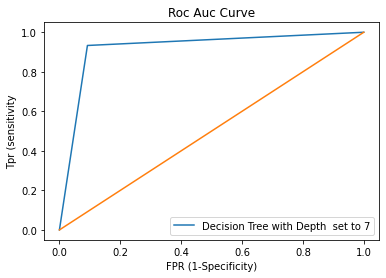

In [21]:
fpr, tpr, th = roc_curve(y, y_pred)

plt.plot(fpr, tpr, label = 'Decision Tree with Depth  set to 7')
plt.plot([1,0], [1, 0])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('Tpr (sensitivity')
plt.title('Roc Auc Curve')
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
from sklearn.metrics import confusion_matrix
conf_mat_list = confusion_matrix(y, y_pred= y_pred)
conf_mat = pd.DataFrame(conf_mat_list, columns= ['predicted attrition : NO', 'predicted attrition : yes'], index=['actual attrition : NO', 'actual attrition : yes'])
conf_mat

,predicted attrition : NO,predicted attrition : yes
actual attrition : NO,740,75
actual attrition : yes,45,627


<AxesSubplot:>

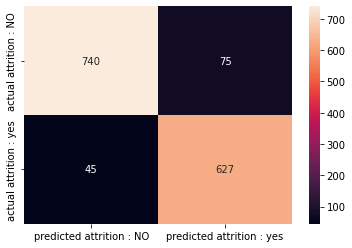

In [23]:
sns.heatmap(conf_mat, annot=True, fmt = 'd')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
tn = conf_mat_list[0][0]
fp = conf_mat_list[0][1]
fn = conf_mat_list[1][0]
tp = conf_mat_list[1][1]

In [25]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
misclassified = (fp + fn) / (tp + tn + fp + fn)
classified = (tp + tn) / (tp + tn + fp + fn)

print(sensitivity)
print(specificity)
print(misclassified)
print(classified)



0.9330357142857143
0.9079754601226994
0.08069939475453934
0.9193006052454606


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
dtf = DecisionTreeClassifier(max_leaf_nodes = 5)
dtf.fit(X_final, y)


DecisionTreeClassifier(max_leaf_nodes=5)

In [27]:
!pip install pydotplus

In [28]:
!pip install graphviz

In [29]:
from graphviz import *

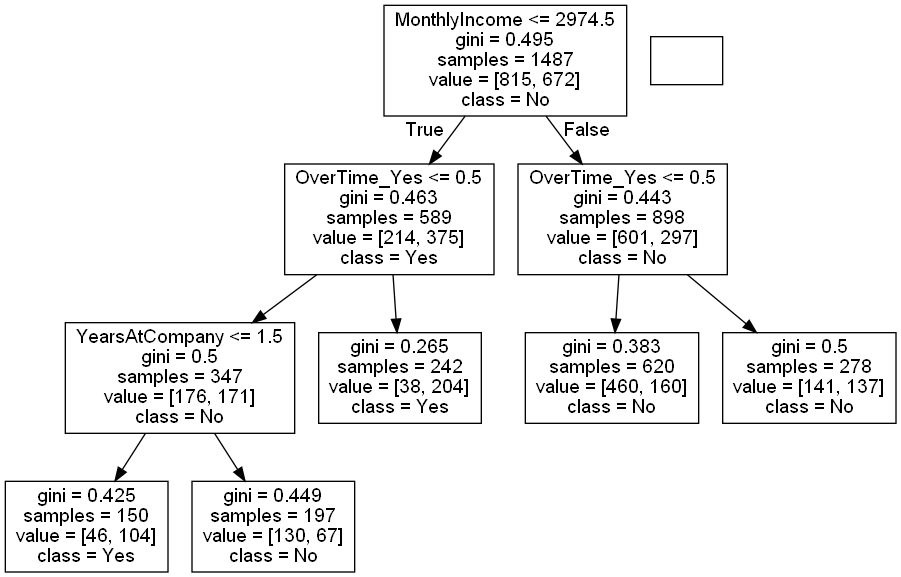

In [30]:

from sklearn import tree
dot_data = tree.export_graphviz(dtf, feature_names = X_final.columns, class_names = ['No', 'Yes'])
dot_data

import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtf, X_final, y, cv = 10)
scores

array([0.69798658, 0.7114094 , 0.7114094 , 0.72483221, 0.71812081,
       0.67114094, 0.7114094 , 0.60810811, 0.77702703, 0.68918919])

In [32]:
scores.mean()

0.7020633049156539

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [33]:
params = {'criterion': ['entropy', 'gini'],
 'max_depth': range(2, 10),
 'min_samples_split': range(2,10)}


In [34]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_final, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [35]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 4}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
best_dt = grid.best_estimator_
scores = cross_val_score(best_dt, X_final, y, cv = 10, scoring = 'roc_auc')
scores

array([0.9335512 , 0.91948076, 0.9271933 , 0.91263196, 0.93092465,
       0.91545322, 0.91317801, 0.93799521, 0.87212088, 0.87055463])

In [37]:
scores.mean()

0.9133083817059028

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
len(df_emp.columns)

18

In [39]:
import random

cols = list(X_final.columns)
cols

['Age',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'YearsAtCompany',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'OverTime_Yes']

In [40]:
predictions = []

for i in range(5):
    sample_feat = random.choices(cols, k = 20)
    dtf = DecisionTreeClassifier()
    dtf.fit(X_final[sample_feat], y)
    predictions.append(dtf.predict(X_final[sample_feat]))


In [41]:
predictions

[array([1, 1, 1, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 0, 1], dtype=int64),
 array([1, 1, 1, ..., 1, 0, 1], dtype=int64)]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df_emp" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
model_predictions_df = pd.DataFrame(columns = ['P1', 'P2', 'P3', 'P4', 'P5'])
model_predictions_df['P1'] = predictions[0]
model_predictions_df['P2'] = predictions[1]
model_predictions_df['P3'] = predictions[2]
model_predictions_df['P4'] = predictions[3]
model_predictions_df['P5'] = predictions[4]

model_predictions_df


,P1,P2,P3,P4,P5
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1482,0,0,0,0,0
1483,1,1,1,1,1
1484,1,1,1,1,1
1485,0,0,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df_emp" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
model_predictions_df['Voted_Result'] = model_predictions_df.mode(axis = 1)
model_predictions_df


,P1,P2,P3,P4,P5,Voted_Result
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
1482,0,0,0,0,0,0
1483,1,1,1,1,1,1
1484,1,1,1,1,1,1
1485,0,0,0,0,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
new_y_pred = model_predictions_df['Voted_Result']

from sklearn.metrics import accuracy_score
print(roc_auc_score(y, new_y_pred))
print(accuracy_score(y, new_y_pred))

#overfitting detected

1.0
1.0


<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators = 3)
rf.fit(X_final, y)
rf.score(X_final, y)


0.9865501008742434

In [46]:
y_pred = rf.predict(X_final)
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       815
           1       0.98      0.99      0.99       672

    accuracy                           0.99      1487
   macro avg       0.99      0.99      0.99      1487
weighted avg       0.99      0.99      0.99      1487



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [47]:
params = {'criterion' : ['entropy', 'gini'],
    'n_estimators' : [90, 100, 150, 200],
    'max_depth' : [10, 15, 20],
    'min_samples_split' : [2, 5, 8]}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(RandomForestClassifier(), params)
grid.fit(X_final, y)

grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 2,
 'n_estimators': 100}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [145]:
best_rf = grid.best_estimator_
scores = cross_val_score(best_rf, X_final, y, cv = 10, scoring = 'roc_auc')
scores.mean()

0.9937291034333618

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [146]:
feat_imp = pd.DataFrame(columns = ['Feature', 'Score'])
feat_imp['Feature'] = X_final.columns
feat_imp['Score'] = best_rf.feature_importances_
feat_imp.sort_values(by = 'Score', ascending = False)


,Feature,Score
6,MonthlyIncome,0.140833
0,Age,0.119786
10,YearsAtCompany,0.087481
1,DistanceFromHome,0.083270
29,OverTime_Yes,0.068955
8,PercentSalaryHike,0.064608
7,NumCompaniesWorked,0.056662
2,EnvironmentSatisfaction,0.051460
5,JobSatisfaction,0.049391
3,JobInvolvement,0.043536


In [147]:
list(feat_imp.sort_values(by = 'Score', ascending = False)['Feature'])

['MonthlyIncome',
 'Age',
 'YearsAtCompany',
 'DistanceFromHome',
 'OverTime_Yes',
 'PercentSalaryHike',
 'NumCompaniesWorked',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'Gender_Male',
 'BusinessTravel_Travel_Frequently',
 'EducationField_Life Sciences',
 'BusinessTravel_Travel_Rarely',
 'EducationField_Medical',
 'Department_Sales',
 'Department_Research & Development',
 'EducationField_Technical Degree',
 'JobRole_Sales Representative',
 'JobRole_Research Scientist',
 'JobRole_Laboratory Technician',
 'JobRole_Sales Executive',
 'EducationField_Marketing',
 'EducationField_Other',
 'JobRole_Manufacturing Director',
 'JobRole_Human Resources',
 'JobRole_Manager',
 'JobRole_Research Director',
 'PerformanceRating']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [148]:
X_19 = X_final[['MonthlyIncome','Age','DistanceFromHome','YearsAtCompany','PercentSalaryHike','OverTime_Yes','NumCompaniesWorked','EnvironmentSatisfaction','JobSatisfaction','JobInvolvement']]
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_19, y)
rf.score(X_19, y)

0.9986550100874243

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [149]:
y_pred = rf.predict(X_19)
cm = confusion_matrix(y, y_pred)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]



In [150]:
cm = confusion_matrix(y, y_pred= y_pred)
cm = pd.DataFrame(cm, columns= ['predicted attrition : NO', 'predicted attrition : yes'], index=['actual attrition : NO', 'actual attrition : yes'])
cm

,predicted attrition : NO,predicted attrition : yes
actual attrition : NO,815,0
actual attrition : yes,2,670


<AxesSubplot:>

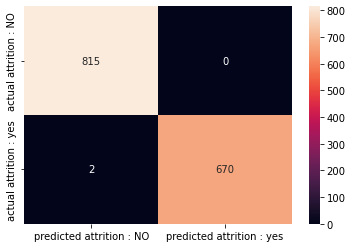

In [151]:
sns.heatmap(cm, annot=True, fmt = 'd')

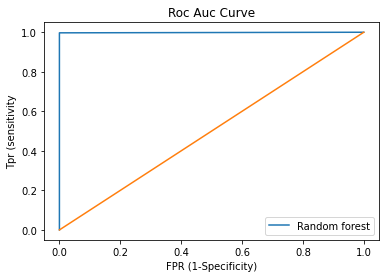

In [152]:
fpr, tpr, th = roc_curve(y, y_pred)

plt.plot(fpr, tpr, label = 'Random forest')
plt.plot([1,0], [1, 0])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('Tpr (sensitivity')
plt.title('Roc Auc Curve')
plt.legend()
plt.show()